In [2]:
# importing the relevant libraries with normal aliases
import pandas as pd
import numpy as np

# visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt
# plot data right below the relevant cell and store result in notebook
%matplotlib inline

# machine learning tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the Data

In [8]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# combine the datasets back to one
combined_df = [train_df, test_df]

# Simple data structure analysis
## Get an overview about the Data 

In [6]:
# showing first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# showing last five rows
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# simple data description
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# inspect the dataset values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Find simple correlations

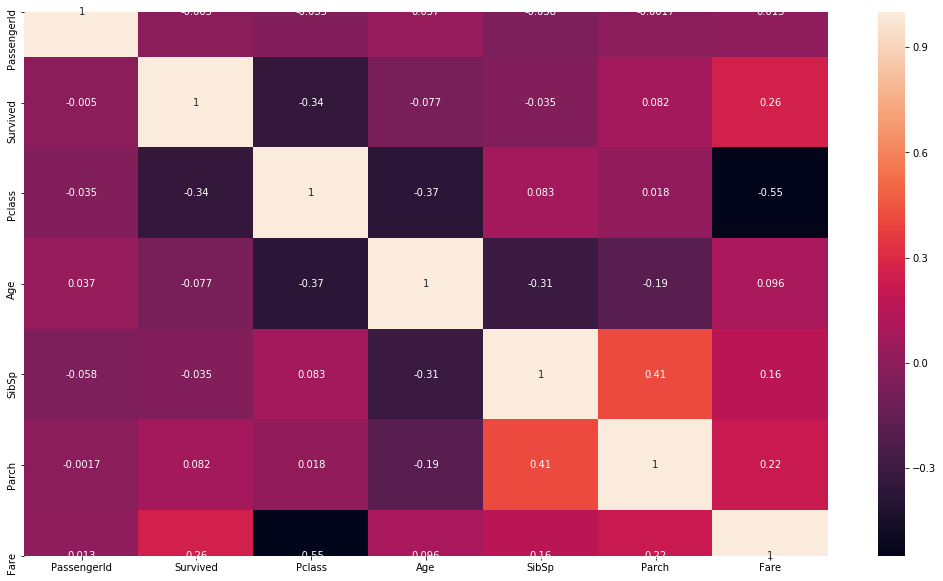

In [17]:
# correlations in figure
# build new figure and define figure size
plt.figure(figsize=(18,10))
# show coorelations in a heatmap 
# annot=True shows the correlation values
sns.heatmap(train_df.corr(),annot=True)

# seems like surviving is mostly correlated to fare
# but thats not a great correlation

# Going into detail

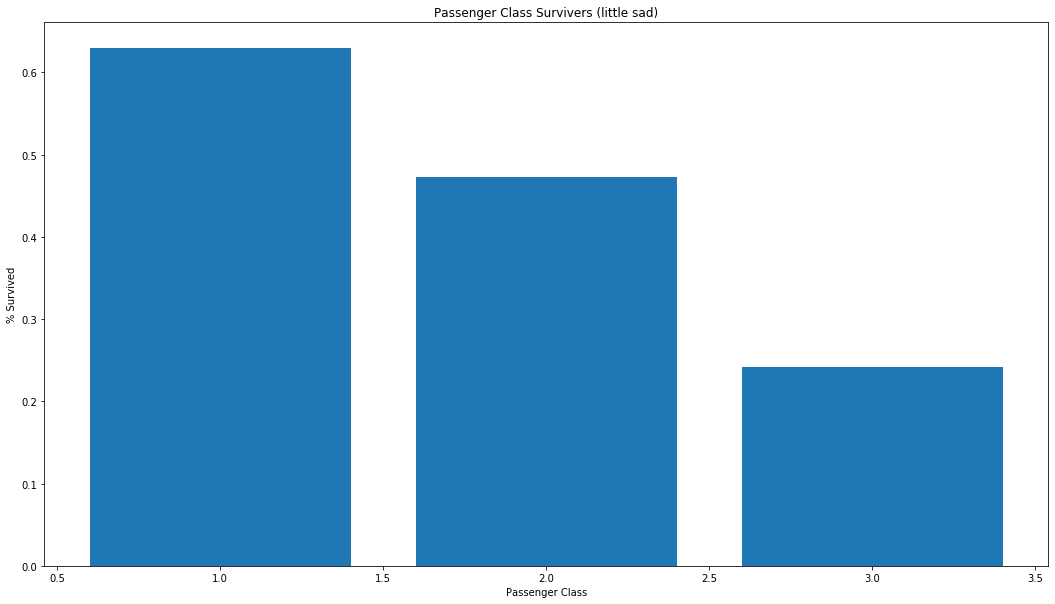

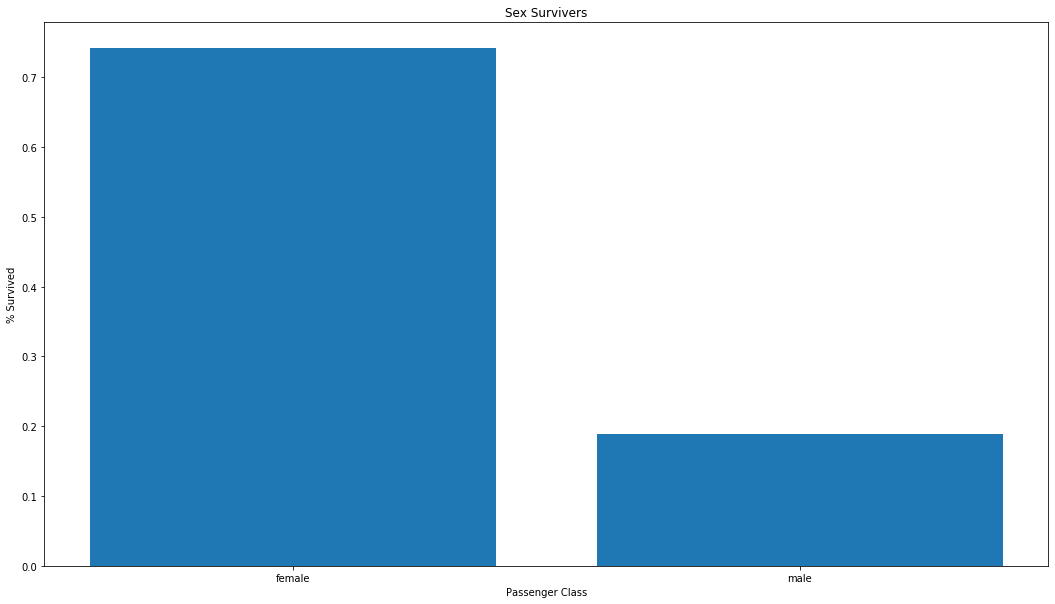

In [37]:
# group by the passenger classes
# Ok, what happens:
# 1. define the data frame groups: ['Pclass', 'Survived']
# 2. group by the relevant column of our interest 'Pclass'
# 3. build the mean and sort by survived
# as_index=False is used to specify, that our groupby value should not be the index
# otherwise plotting would be not possible before building a new index
class_group_df = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# group by sex
sex_group_df = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# see the results
# build new figure and define figure size
plt.figure(figsize=(18,10))
plt.bar(class_group_df['Pclass'], class_group_df['Survived'])
plt.title('Passenger Class Survivers (little sad)')
# building a legend
plt.xlabel('Passenger Class')
plt.ylabel('% Survived')
plt.show()

plt.figure(figsize=(18,10))
plt.bar(sex_group_df['Sex'], sex_group_df['Survived'])
plt.title('Sex Survivers')
# building a legend
plt.xlabel('Passenger Class')
plt.ylabel('% Survived')
plt.show()

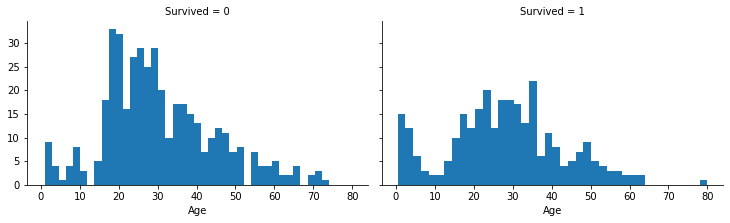

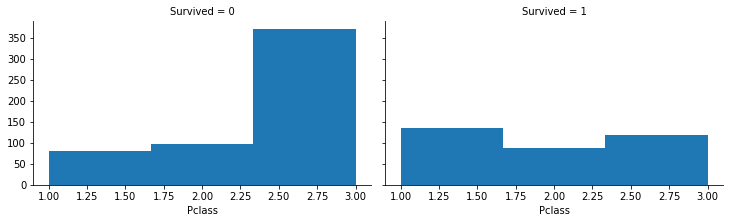

In [49]:
# that can be done a lot easier
g = sns.FacetGrid(train_df, col='Survived', size=3.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=40)

g = sns.FacetGrid(train_df, col='Survived', size=3.2, aspect=1.6)
g.map(plt.hist, 'Pclass', bins=3)

# OK, Obersations:
# kids survive, 15 to 30 year olds die, Passengers from class 3 die most likely

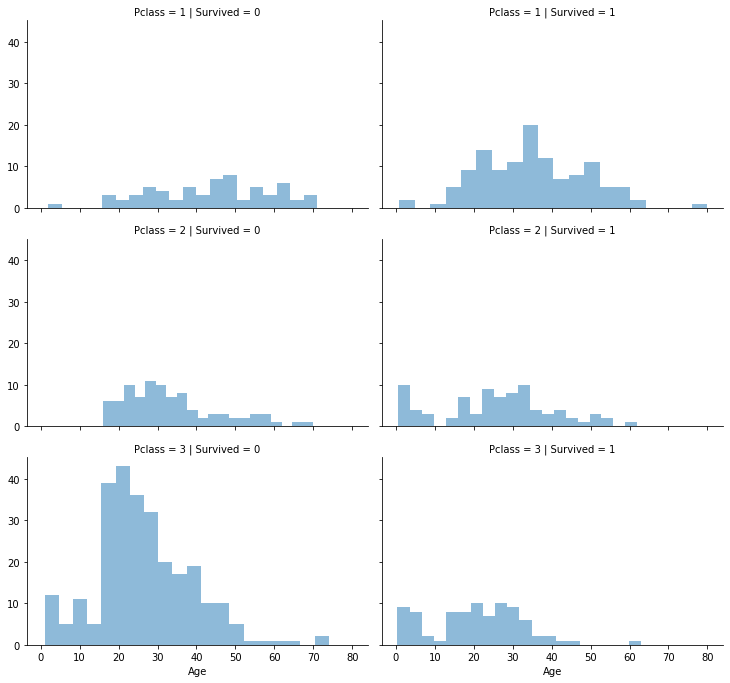

In [52]:
# go into detail about the classes, I´m still not that convinced for class 1
g_new = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3.2, aspect=1.6)
g_new.map(plt.hist, 'Age', alpha=.5, bins=20)

# now its better:
# class 3 clearly dies, sad

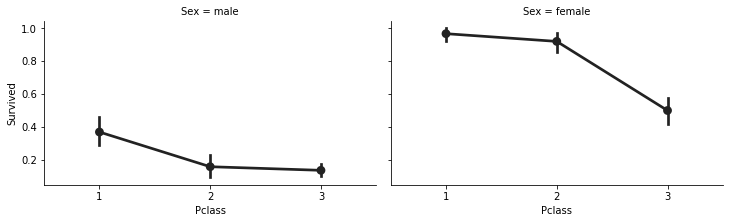

In [56]:
# ok let´s see whats about the sex
g_sex = sns.FacetGrid(train_df, col='Sex', size=3.2, aspect=1.6)
g_sex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')

# ok, womens are clearly the survivors in all classes

# Let´s do some ML :P

In [9]:
# prepare the values
# drop the survived attribute --> thats what we search for
train_d = train_df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()
X_train = train_d[["Pclass", "Sex", "Age", "Fare"]]
# reset the index
X_train.reset_index(inplace=True)
Y_train = train_d["Survived"]

# test data
X_test = test_df[["Pclass", "Sex", "Age", "Fare"]].dropna()
X_test.reset_index(inplace=True)

# transform sex to values (1 for women, 0 for men)
X_train["Sex"] = np.where(X_train['Sex'] == "male", 0, 1)
X_test["Sex"] = np.where(X_test['Sex'] == "male", 0, 1)

# see the shapes
X_train.shape, Y_train.shape, X_test.shape

((714, 5), (714,), (331, 5))

In [12]:
# Logistic Regression
reg = LogisticRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)
# evaluate the score
reg_acc = reg.score(X_train, Y_train)
# model score
print(round(reg_acc * 100, 2))

79.13


C:\Users\z003x9pk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Try some other algorithims

In [175]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

# evaluate the score
rf_acc = rf.score(X_train, Y_train)
# model score
print(round(rf_acc * 100, 2))

# ok that shouldn´t be possible

98.04


In [345]:
# Neighrest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

# evaluate the score
knn_acc = knn.score(X_train, Y_train)
# model score
print(round(knn_acc * 100, 2))

86.69


# Try some grouping

In [193]:
# if we group our features in a way we see the correlations,
# our model could perfom better

# what about family size
for dataset in combined_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

# ok, we see that family size of 4 is ideal to survive

# lets build the features with family size instad of fare
train_d = train_df[["Survived", "Pclass", "Sex", "FamilySize"]].dropna()
X_train = train_d[["Pclass", "Sex", "FamilySize"]]
# reset the index
X_train.reset_index(inplace=True)
Y_train = train_d["Survived"]

# test data
X_test = test_df[["Pclass", "Sex", "FamilySize"]].dropna()
X_test.reset_index(inplace=True)

# transform sex to values (1 for women, 0 for men)
X_train["Sex"] = np.where(X_train['Sex'] == "male", 0, 1)
X_test["Sex"] = np.where(X_test['Sex'] == "male", 0, 1)

# see the shapes
X_train.shape, Y_train.shape, X_test.shape



# sets use our best algorithm to test the new feature
# Neighrest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

# evaluate the score
knn_acc = knn.score(X_train, Y_train)
# model score
print(round(knn_acc * 100, 2))

# thats better

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
80.25


# Ok let´s try some Neural Net

In [14]:
# import relevant libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from numpy.random import seed
from tensorflow import set_random_seed

In [198]:
#combine data
df = pd.concat([train_df, test_df], axis=0, sort=True)

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [199]:
import math
# Build features

# Family Size
df["FamilySize"] = df["Parch"] + df["SibSp"] + 1

# Child Definition
df['Child'] = ( (df["Age"] <= 18) & (df["Age"] >= 5) ).astype(int)

# Toddler Definition
df['Toddler'] = ( df["Age"] < 5 ).astype(int)

# Add Age Groups
bins = np.linspace(math.floor(df["Age"].min()), math.ceil(df["Age"].max()), 10)
labels = range(1, len(bins))

print(bins)
print(labels)

df['AgeGroup'] = pd.cut(df["Age"], bins=bins, labels=labels)

df.head()

[ 0.          8.88888889 17.77777778 26.66666667 35.55555556 44.44444444
 53.33333333 62.22222222 71.11111111 80.        ]
range(1, 10)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,Child,Toddler,AgeGroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,0,0,3
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,0,0,5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,0,3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,0,0,4
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,0,0,4


C:\Users\z003x9pk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


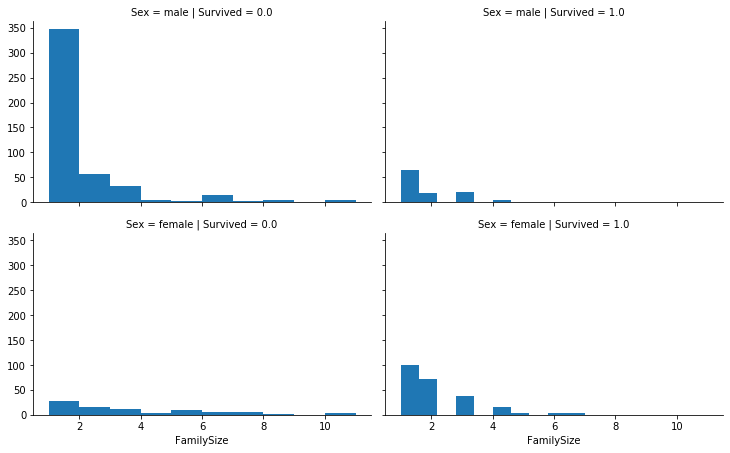

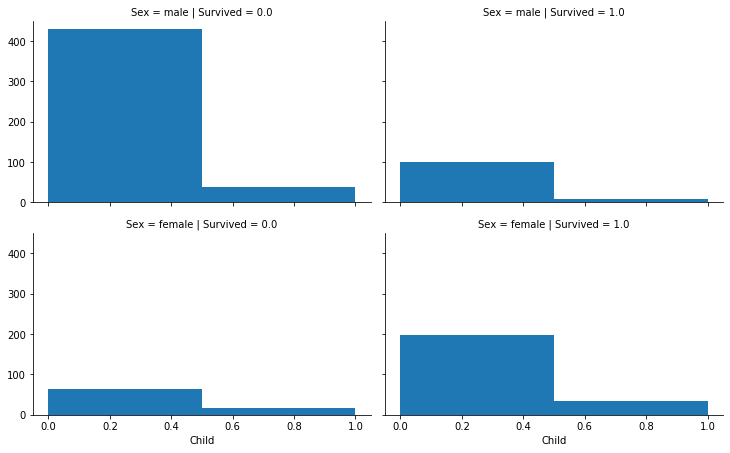

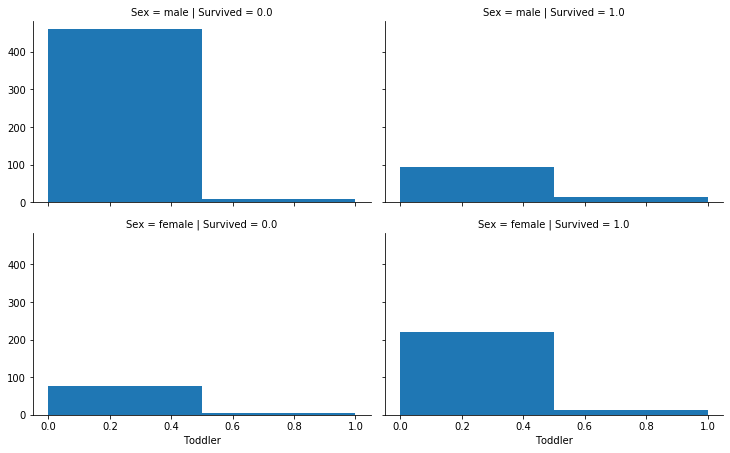

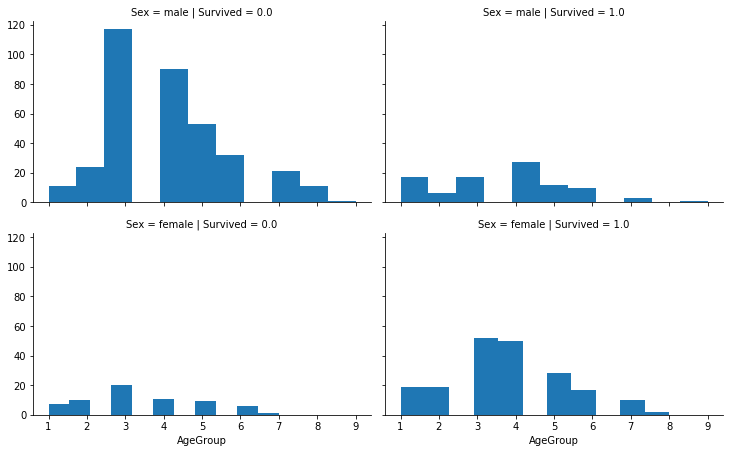

In [200]:
# Look at our features and the survival rate of them

g = sns.FacetGrid(df, col='Survived', row='Sex', size=3.2, aspect=1.6)
g.map(plt.hist, 'FamilySize', bins=10)

g = sns.FacetGrid(df, col='Survived', row='Sex', size=3.2, aspect=1.6)
g.map(plt.hist, 'Child', bins=2)

g = sns.FacetGrid(df, col='Survived', row='Sex', size=3.2, aspect=1.6)
g.map(plt.hist, 'Toddler', bins=2)

g = sns.FacetGrid(df, col='Survived', row='Sex', size=3.2, aspect=1.6)
g.map(plt.hist, 'AgeGroup', bins=11)

In [201]:
# Transform Sex
df["Sex"] = np.where(df["Sex"] == 'male', 0, 1)

# Drop unneeded values
df.drop(['Name', 'Cabin', 'Parch', 'SibSp', 'PassengerId', 'Ticket', 'AgeGroup'], inplace=True, axis=1)

df.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,FamilySize,Child,Toddler
0,22.0,S,7.2500,3,0,0.0,2,0,0
1,38.0,C,71.2833,1,1,1.0,2,0,0
2,26.0,S,7.9250,3,1,1.0,1,0,0
3,35.0,S,53.1000,1,1,1.0,2,0,0
4,35.0,S,8.0500,3,0,0.0,1,0,0


In [202]:
# Transform the class to seperate columns
for var in ['Embarked', 'Pclass']:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [203]:
# transform the values to be between 1 and 0
scaler = MinMaxScaler()
# we only want to scale the values, that are out of range
out_range_comumns = ['Age', 'Fare', 'FamilySize']
for var in out_range_comumns:
    # transform to float
    df[var] = df[var].astype('float32')
    # scale values
    df[var] = scaler.fit_transform(df[var].values.reshape(-1,1))

In [293]:
# replace the null values
test_NN = df.copy()

# test the null values
print('Age NULL:', test_NN.Age.isna().sum())
print('Fare NULL:', test_NN.Fare.isna().sum())
print('Sex NULL:', test_NN.Sex.isna().sum())
print('FamilySize NULL:', test_NN.FamilySize.isna().sum())

Age NULL: 263
Fare NULL: 1
Sex NULL: 0
FamilySize NULL: 0


In [295]:
# ok lets just drop them for simplicity now
test_NN = test_NN[test_NN.Age.notnull()]
test_NN = test_NN[test_NN.Fare.notnull()]

In [296]:
# Finally build train and test data
X_train = test_NN[test_NN.Survived.notnull()].drop('Survived', axis=1)
y_train = test_NN[test_NN.Survived.notnull()].Survived
X_test = test_NN[test_NN.Survived.isnull()].drop('Survived', axis=1)

In [297]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
Age           714 non-null float32
Fare          714 non-null float32
Sex           714 non-null int32
FamilySize    714 non-null float32
Child         714 non-null int32
Toddler       714 non-null int32
Embarked_C    714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_1      714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float32(3), int32(3), uint8(6)
memory usage: 26.5 KB


In [332]:
# Build Model
def buildModel():
    # ensure that random numbers will be the same every time
    seed(42)
    set_random_seed(42)
    # build the model
    model = Sequential()
    # Dense is a Layer, that is fully connectd
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # loss function binary_crossentropy:
    # https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    # used if the expected output is between 0 and 1, so ideal for survive
    
    # Optimizer Adam: 
    # https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
    # used to update the weights of training data (currently mostly used)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [333]:
model = buildModel()

In [334]:
# fit the model
# batch_size: defines the number of samples to work through before updating the internal model parameters.
# epoch: defines the number times that the learning algorithm will work through the entire training dataset.
hist = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1, shuffle=True)

Train on 642 samples, validate on 72 samples
Epoch 1/150
642/642 [==============================] - 1s 2ms/step - loss: 0.7226 - acc: 0.4143 - val_loss: 0.7154 - val_acc: 0.3889
Epoch 2/150
642/642 [==============================] - 0s 103us/step - loss: 0.6874 - acc: 0.4268 - val_loss: 0.6752 - val_acc: 0.5278
Epoch 3/150
642/642 [==============================] - 0s 97us/step - loss: 0.6589 - acc: 0.6324 - val_loss: 0.6425 - val_acc: 0.7083
Epoch 4/150
642/642 [==============================] - 0s 90us/step - loss: 0.6375 - acc: 0.6745 - val_loss: 0.6208 - val_acc: 0.7500
Epoch 5/150
642/642 [==============================] - 0s 93us/step - loss: 0.6209 - acc: 0.7305 - val_loss: 0.6015 - val_acc: 0.8194
Epoch 6/150
642/642 [==============================] - 0s 123us/step - loss: 0.6051 - acc: 0.7539 - val_loss: 0.5819 - val_acc: 0.8056
Epoch 7/150
642/642 [==============================] - 0s 114us/step - loss: 0.5902 - acc: 0.7570 - val_loss: 0.5649 - val_acc: 0.8194
Epoch 8/150
642

642/642 [==============================] - 0s 123us/step - loss: 0.4145 - acc: 0.8178 - val_loss: 0.3502 - val_acc: 0.8611
Epoch 62/150
642/642 [==============================] - 0s 104us/step - loss: 0.4135 - acc: 0.8146 - val_loss: 0.3487 - val_acc: 0.8333
Epoch 63/150
642/642 [==============================] - 0s 145us/step - loss: 0.4140 - acc: 0.8115 - val_loss: 0.3478 - val_acc: 0.8333
Epoch 64/150
642/642 [==============================] - 0s 128us/step - loss: 0.4151 - acc: 0.8100 - val_loss: 0.3526 - val_acc: 0.8611
Epoch 65/150
642/642 [==============================] - 0s 104us/step - loss: 0.4138 - acc: 0.8178 - val_loss: 0.3548 - val_acc: 0.8194
Epoch 66/150
642/642 [==============================] - 0s 84us/step - loss: 0.4135 - acc: 0.8193 - val_loss: 0.3526 - val_acc: 0.8194
Epoch 67/150
642/642 [==============================] - 0s 65us/step - loss: 0.4124 - acc: 0.8224 - val_loss: 0.3493 - val_acc: 0.8194
Epoch 68/150
642/642 [==============================] - 0s 69us

642/642 [==============================] - 0s 156us/step - loss: 0.4023 - acc: 0.8287 - val_loss: 0.3408 - val_acc: 0.8611
Epoch 122/150
642/642 [==============================] - 0s 173us/step - loss: 0.4015 - acc: 0.8255 - val_loss: 0.3373 - val_acc: 0.8472
Epoch 123/150
642/642 [==============================] - 0s 150us/step - loss: 0.4010 - acc: 0.8193 - val_loss: 0.3363 - val_acc: 0.8472
Epoch 124/150
642/642 [==============================] - 0s 134us/step - loss: 0.4009 - acc: 0.8287 - val_loss: 0.3436 - val_acc: 0.8750
Epoch 125/150
642/642 [==============================] - 0s 117us/step - loss: 0.4028 - acc: 0.8240 - val_loss: 0.3365 - val_acc: 0.8472
Epoch 126/150
642/642 [==============================] - 0s 92us/step - loss: 0.4001 - acc: 0.8271 - val_loss: 0.3370 - val_acc: 0.8472
Epoch 127/150
642/642 [==============================] - 0s 84us/step - loss: 0.4008 - acc: 0.8209 - val_loss: 0.3374 - val_acc: 0.8472
Epoch 128/150
642/642 [==============================] - 

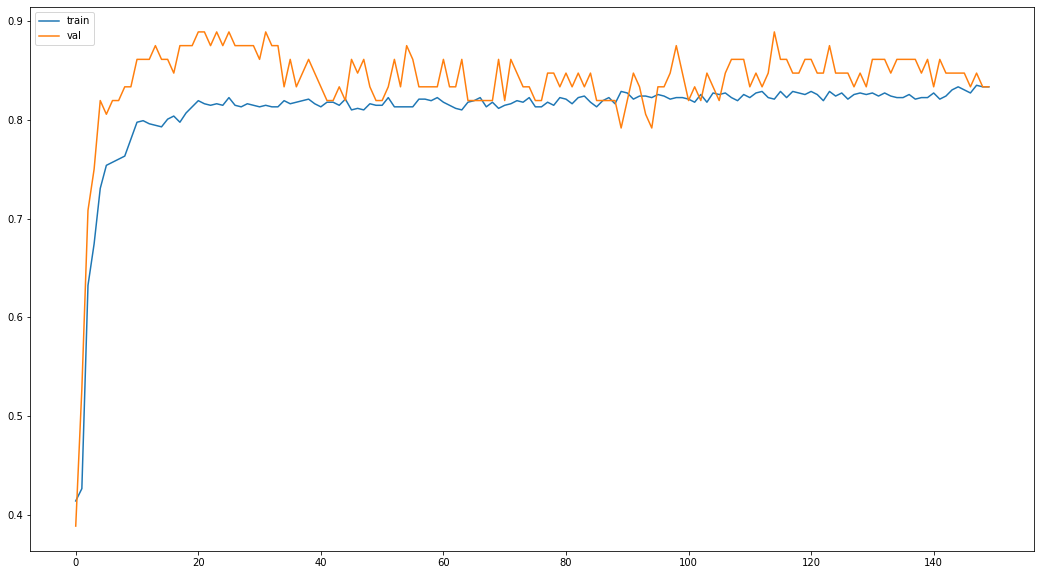

In [335]:
# let´s visualize our accuracy and loss
plt.figure(figsize=(18,10))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

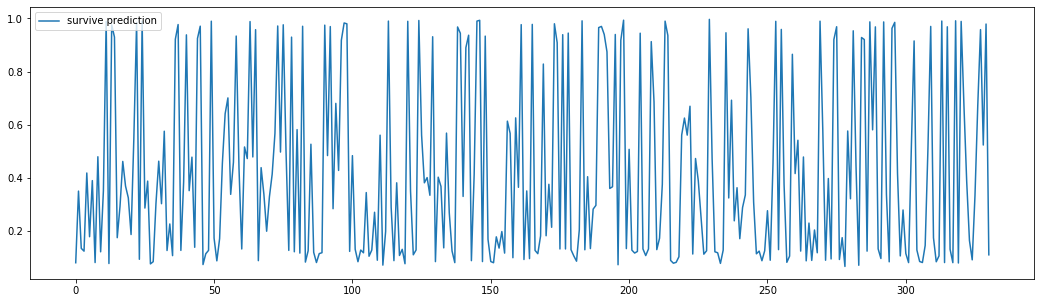

[[0.08147666]
 [0.35078585]
 [0.1355586 ]
 [0.12507305]
 [0.418907  ]
 [0.1793367 ]
 [0.39036012]
 [0.08216652]
 [0.47998062]
 [0.12256896]
 [0.35155725]
 [0.98879707]
 [0.0785673 ]
 [0.9758686 ]
 [0.9299789 ]
 [0.17564917]
 [0.29316854]
 [0.46239197]
 [0.3696628 ]
 [0.32569027]
 [0.1875906 ]
 [0.5479524 ]
 [0.98477364]
 [0.09441262]
 [0.9889509 ]
 [0.28708893]
 [0.38847184]
 [0.07720789]
 [0.08540851]
 [0.3047942 ]
 [0.46333936]
 [0.30346596]
 [0.5760293 ]
 [0.12748647]
 [0.22724354]
 [0.10817954]
 [0.9219029 ]
 [0.97707576]
 [0.12787232]
 [0.3855062 ]
 [0.93829894]
 [0.35251522]
 [0.47850055]
 [0.13954431]
 [0.92473006]
 [0.97092867]
 [0.07461363]
 [0.11522734]
 [0.12793979]
 [0.9897133 ]
 [0.17387691]
 [0.0885767 ]
 [0.17204612]
 [0.45554632]
 [0.64179826]
 [0.70121455]
 [0.33857486]
 [0.45959803]
 [0.9338292 ]
 [0.43904254]
 [0.13326359]
 [0.51675767]
 [0.473176  ]
 [0.98828053]
 [0.47919267]
 [0.9578326 ]
 [0.08926627]
 [0.43904254]
 [0.33921638]
 [0.19995064]
 [0.32931218]
 [0.41

In [336]:
y_hat = model.predict(X_test)

# visualize the results
plt.figure(figsize=(18,5))
plt.plot(y_hat)
plt.legend(['survive prediction'], loc='upper left')
plt.show()

print(y_hat)